<a href="https://colab.research.google.com/github/AxelVas/Sales_planning_comp.games_online_store/blob/main/%D0%9F%D0%BB%D0%B0%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6_%D0%BA%D0%BE%D0%BC%D0%BF_%D0%B8%D0%B3%D1%80_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта
____

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. <br>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
____
<a id='start'></a>

## Содержание проекта

### Глава 1. Откроем файл с данными и изучим общую информацию
   * <a href='#step_1.1'> Открокем файл по адресу(/datasets/games.csv) и изучим данные</a>
   
### Глава 2. Подготовим данные
   * <a href='#step_2.1'>Заменим названия столбцов (приведём к нижнему регистру)</a>
   * <a href='#step_2.3'>Обработаем пропуски по необходимости</a>
   * <a href='#step_2.4'>Аббревиатура 'tbd' в столбцах с рейтингом. Отдельно разберём это значение и опишем, как его обработать</a>
   * <a href='#step_2.5'>Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец</a>
   * <a href='#step_2.end'>Вывод</a>
   
### Глава 3. Проведём исследовательский анализ данных
   * <a href='#step_3.1'>Посмотрим, сколько игр выпускалось в разные годы</a>
   * <a href='#step_3.2'>Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте  распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы</a>
   * <a href='#step_3.3'>Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.</a>
   
   * <a href='#step_3.4'>Определим какие платформы лидируют по продажам, растут или падают. Выберим несколько потенциально прибыльных платформ.</a>
   * <a href='#step_3.5'>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.</a>
   * <a href='#step_3.6'>Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.</a>
   * <a href='#step_3.7'> Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.</a>
   * <a href='#step_3.8'>Соотнесём выводы с продажами игр на других платформах.</a>
   * <a href='#step_3.9'>Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?</a>
   * <a href='#step_3.end'>Вывод</a>
   
### Глава 4. Составим портрет пользователя каждого региона
   * <a href='#step_4.1'>Определим для пользователя каждого региона (NA, EU, JP):</a>
       * <a href='#step_4.2'>Самые популярные платформы (топ-5). Опишем различия в долях продаж.</a>
       * <a href='#step_4.3'>Самые популярные жанры (топ-5). Поясним разницу.</a>
       * <a href='#step_4.4'>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</a>
   * <a href='#step_4.end'>Вывод</a>
   
### Глава 5. Проверим гипотезы
   * <a href='#step_5.1'>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a>
   * <a href='#step_5.2'>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a>
   * <a href='#step_5.end'>Вывод</a>
   
### Глава 6. Общий вывод
   * <a href='#step_6.end'>Вывод</a>
   ___
   

<a id="step_1.1"></a>
### Глава 1. Откроем файл с данными и изучим общую информацию

Для начала загрузим библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Пропишем настройки, чтобы выводились все колонки без скрытия

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data=pd.read_csv('/datasets/games.csv')

Посмотрим на таблицу

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим информацию

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В данных довольно много колонок с пропусками, а твк же есть заглавные буквы, для работы с такими данными требуется привести их к рабочему образцу. По-возможности заполнить недостающие данные и привети строки в нижний регистр. Так же посмотрим на дубликаты. 

-----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_2.1"></a>
### Глава 2. Подготовим данные

#### Заменим названия столбцов (приведём к нижнему регистру)

In [ ]:
data.columns = data.columns.str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь приведём данные колонок "name", "platform","genre" в нижний регистр.

In [ ]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

Проверм на дубликаты

In [ ]:
data.duplicated().sum()

0

Выведем уникальные значения колонок, для поиска возможных дублей

#### "name"

In [ ]:
t = data['name'].unique()
print(t)

['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']


Устраним лишние точки

In [ ]:
data['name'] = data['name'].str.replace('.','')

#### "platform"

In [ ]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

замечен дубль, устраним заменой на правильное название

In [ ]:
data['platform'] = data['platform'].str.replace('wiiu','wii')

#### "year_of_release"

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
u=data.loc[data['year_of_release'].isna() == True] 
u.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


<a id="step_2.3"></a>
#### Обработаем пропуски по необходимости

Посмотрим на пропуски в колонке "name"

In [ ]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Исходя из тех данных, которые мы видим, нет никакой значимости сохранять эти строки,т.к. название игр восстановлению не подлежит. Удалим эти строки, чтобы не мешали для дальнейшего подсчёта

In [ ]:
data.dropna(subset=['name'],inplace=True)

In [ ]:
data= data.reset_index(drop=True)

Проработаем пропуски в колонке **"year_of_release"**

In [ ]:
data['year_of_release'].isna().sum()

269

Составим функцию, которая будет выбирать из колонки "name" с названием игры год и вставлять его в колонку "year_of_release"

In [ ]:
def year(row):
    for word in row.split():
        if word.isdigit():
            if len(word) == 4:
                return int(word)

In [ ]:
def year_release(row):
    if np.isnan(row['year_of_release']):
        return year(row['name'])
    else:
        return row['year_of_release']
data['year_of_release'] = data.apply(year_release, axis=1)

Проверим результат

In [ ]:
data['year_of_release'].isna().sum()

254

Отлично нам удалось заполнить 15 пропусков в годах актуальными значениями, обработаем остальные пропуски 

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

Для изменения типа на целочисленный, выполним замену недостающих значений на *0*

In [ ]:
data['year_of_release'] = data['year_of_release'].fillna(0)

Приведём значения в колнке "year_of_release" к целочисленному формату.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

<a id="step_2.4"></a>
#### Обратим внимание на аббревиатуру 'tbd' в столбцe "user_score" с рейтингом. Отдельно разберём это значение и опишем, как его обработать

#### "User_Score"

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2424

##### Т.к. аббривиатура "tbe" расшифровывается как - To Be Determined(Будет определено), у нас данных по оценке пользователей нет, в то же время озменить на нулевое значение - это навредить средему значению рейтенга и всей статистике. Самым верным решением будет превратить **tbe* в *nan**, чтобы в дальнейшем мы могли изменить тип данных на численный. Применим метод  *to_numeric()*. 

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим реультат преобразования посмотрев на первые 5 строк таблицы

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="step_2.5"></a>
#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [ ]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['other_sales']+data['jp_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a id="step_2.end"></a>
### Вывод

Мы максимально постарались сохранить все данные и дополнить недостающие, к сожалению ввиду специфики данных применить средее либо медиану к рейтингам - это испортить уже имеющуюся статистику, если данные отсутствуют, значит возможно, что на то есть своя причина, такая как например отсутствие или низкие продажи, либо отсутствие пользовательского интереса и интереса кртиков ввиду своего течения времени(1985-1996 год.) В основном данные приведены в порядок и к нужным типам, и готовы для дальнейшего анализа. 

----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_3.1"></a>
### Глава 3. Проведём исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

In [ ]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').head()

,name
year_of_release,
0,254
1980,9
1981,46
1982,36
1983,17


Для наглядности построим график количества выпускаемых игр по годам

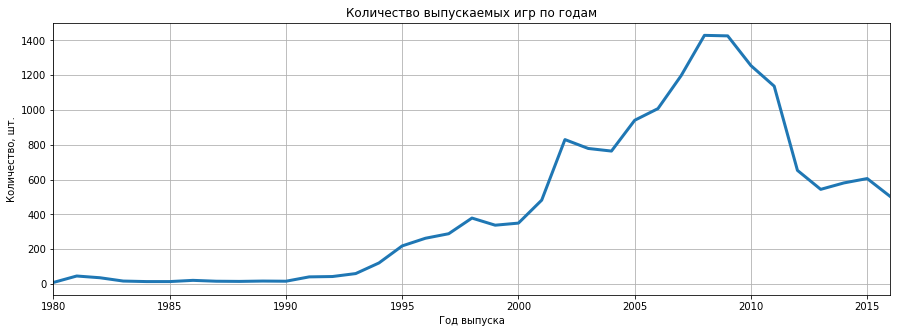

In [ ]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').query('year_of_release > 0').plot(figsize=(15,5), grid=True, title='Количество выпускаемых игр по годам',legend=False, linewidth=3)
plt.ylabel('Количество, шт.')
plt.xlabel('Год выпуска')
plt.show()

<a id="step_3.2"></a>
#### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим  распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы

In [ ]:
rating_platform = data.pivot_table(index=['year_of_release','platform'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales',ascending=False)
rating_platform.head(10)

,,sum_sales
year_of_release,platform,
2004,ps2,220.55
2009,wii,206.97
2002,ps2,205.38
2003,ps2,185.93
2008,wii,171.32
2010,x360,170.03
1998,ps,169.49
2001,ps2,166.43
2005,ps2,160.98


Посмотрим на распределение значений и построим ящик с "усами"

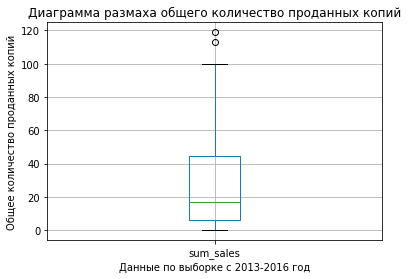

In [ ]:
rating_platform.query('year_of_release == ["2013","2014","2015","2016"]').boxplot()
plt.xlabel('Данные по выборке с 2013-2016 год')
plt.ylabel('Общее количество проданных копий')
plt.title('Диаграмма размаха общего количество проданных копий')
plt.show()

Отсечём выбивающиеся занчения для построения графика

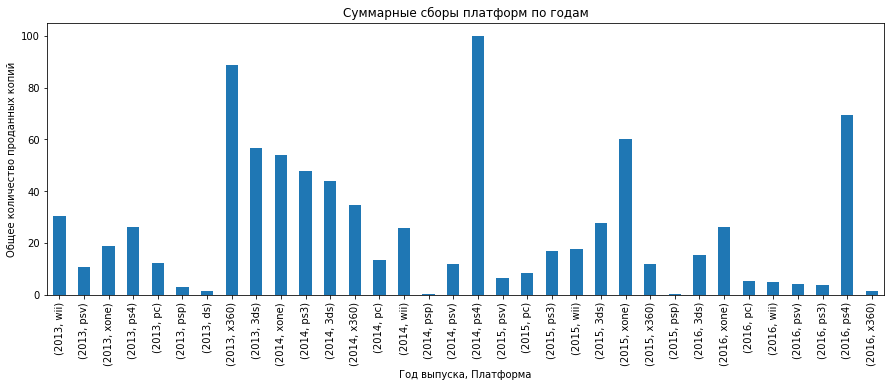

In [ ]:
rating_platform.query('year_of_release == ["2013","2014","2015","2016"] and sum_sales < 110').sort_values(by='year_of_release', ascending=True).plot(kind='bar', figsize=(15,5), grid=False, title='Суммарные сборы платформ по годам',legend=False,)
plt.xlabel('Год выпуска, Платформа')
plt.ylabel('Общее количество проданных копий')
plt.show()

Определим теперь самые популярные платформы и самые провальные для выборки с 2013-2016 годы

In [ ]:
r=rating_platform.query('year_of_release > 0').reset_index().sort_values(by='year_of_release', ascending=True)

In [ ]:
r[r['year_of_release'] == 2013].query('sum_sales == sum_sales.max() or sum_sales == sum_sales.min()')

,year_of_release,platform,sum_sales
27,2013,ps3,113.25
189,2013,ds,1.54


In [ ]:
r[r['year_of_release'] == 2014].query('sum_sales == sum_sales.max() or sum_sales == sum_sales.min()')

,year_of_release,platform,sum_sales
30,2014,ps4,100.00
213,2014,psp,0.24


In [ ]:
r[r['year_of_release'] == 2015].query('sum_sales == sum_sales.max() or sum_sales == sum_sales.min()')

,year_of_release,platform,sum_sales
25,2015,ps4,118.90
218,2015,psp,0.12


In [ ]:
r[r['year_of_release'] == 2016].query('sum_sales == sum_sales.max() or sum_sales == sum_sales.min()')

,year_of_release,platform,sum_sales
41,2016,ps4,69.25
190,2016,x360,1.52


Составим таблицу c лидирующими платформами за выбранный период

In [ ]:
r.loc[[27,30,25,41],:]

,year_of_release,platform,sum_sales
27,2013,ps3,113.25
30,2014,ps4,100.00
25,2015,ps4,118.90
41,2016,ps4,69.25


Составим список с самыми не популярными платформами а тот же период

In [ ]:
r.loc[[189,213,218,190],:]

,year_of_release,platform,sum_sales
189,2013,ds,1.54
213,2014,psp,0.24
218,2015,psp,0.12
190,2016,x360,1.52


Для полной картины постром графики со значениями популярности за все предыдущие годы по популярным и непопулярным платформам

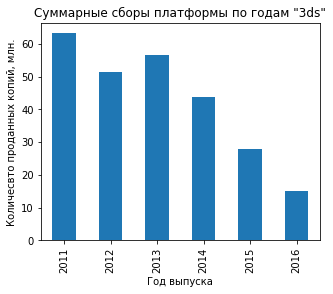

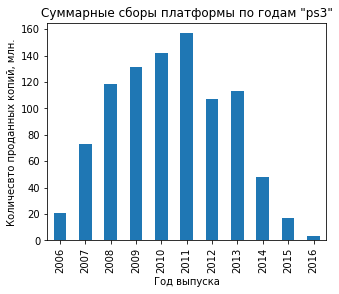

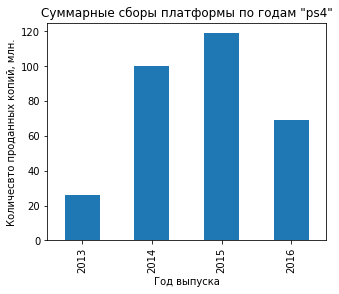

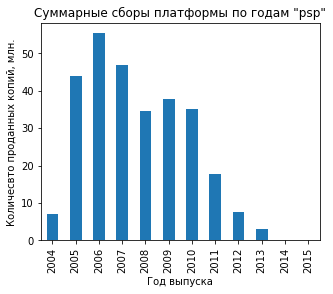

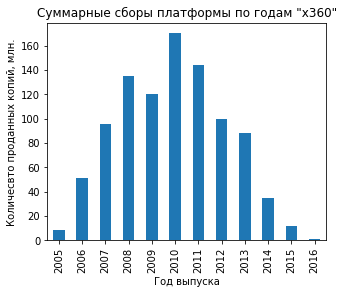

In [ ]:
rating_platform.reset_index(1).query('year_of_release > 0 and platform == ["3ds"]').sort_values(by='year_of_release', ascending=True).plot(kind='bar', figsize=(5,4), grid=False, title='Суммарные сборы платформы по годам "3ds"',legend=False)
plt.ylabel('Количесвто проданных копий, млн.')
plt.xlabel('Год выпуска')
rating_platform.reset_index(1).query('year_of_release > 0 and platform == ["ps3"]').sort_values(by='year_of_release', ascending=True).plot(kind='bar',figsize=(5,4), grid=False, title='Суммарные сборы платформы по годам "ps3"',legend=False)
plt.ylabel('Количесвто проданных копий, млн.')
plt.xlabel('Год выпуска')
rating_platform.reset_index(1).query('year_of_release > 0 and platform == ["ps4"]').sort_values(by='year_of_release', ascending=True).plot(kind='bar',figsize=(5,4), grid=False, title='Суммарные сборы платформы по годам "ps4"',legend=False)
plt.ylabel('Количесвто проданных копий, млн.')
plt.xlabel('Год выпуска')
rating_platform.reset_index(1).query('year_of_release > 0 and platform == "psp"').sort_values(by='year_of_release', ascending=True).plot(kind='bar',figsize=(5,4), grid=False, title='Суммарные сборы платформы по годам "psp"',legend=False)
plt.ylabel('Количесвто проданных копий, млн.')
plt.xlabel('Год выпуска')
rating_platform.reset_index(1).query('year_of_release > 0 and platform == "x360"').sort_values(by='year_of_release', ascending=True).plot(kind='bar',figsize=(5,4), grid=False, title='Суммарные сборы платформы по годам "x360"',legend=False)
plt.ylabel('Количесвто проданных копий, млн.')
plt.xlabel('Год выпуска')

plt.show()

<a id="step_3.3"></a>
#### Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год

In [ ]:
prev_data = data.query('year_of_release == [2013,2014,2015,2016]').sort_values(by='sum_sales', ascending=False)
prev_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<a id="step_3.4"></a>
#### Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ

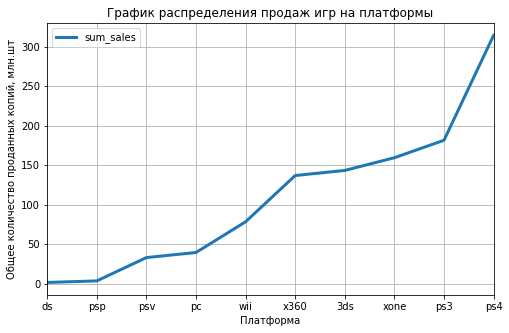

In [ ]:
prev_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales').plot(grid=True,linewidth=3, title='График распределения продаж игр на платформы',figsize=(8,5))
plt.xlabel('Платформа')
plt.ylabel('Общее количество проданных копий, млн.шт')
plt.show()

<a id="step_3.5"></a>
#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [ ]:
box_data = prev_data.pivot_table(index=['name','platform'], values='sum_sales', aggfunc='mean').sort_values(by='sum_sales',ascending=False)
box_data.head()

sum_sales
name                      platform           
grand theft auto v        ps3           21.05
                          x360          16.27
call of duty: black ops 3 ps4           14.63
pokemon x/pokemon y       3ds           14.60
grand theft auto v        ps4           12.62

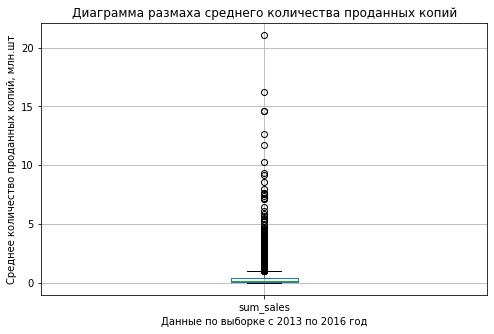

In [ ]:
box_data.boxplot(figsize=(8,5))
plt.xlabel('Данные по выборке с 2013 по 2016 год')
plt.ylabel('Среднее количество проданных копий, млн.шт')
plt.title('Диаграмма размаха среднего количества проданных копий')
plt.show()

Отсечём выбивающиеся данные для дальнейшей работы

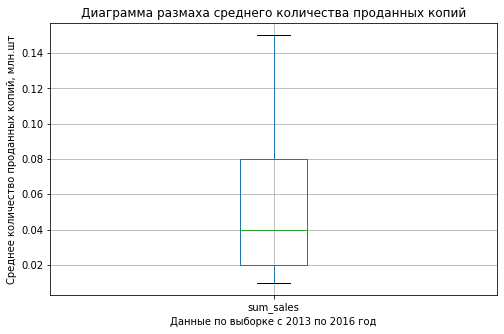

In [ ]:
prev_data.pivot_table(index=['name','platform'], values='sum_sales', aggfunc='mean').sort_values(by='sum_sales',ascending=False).query('sum_sales < 0.16').boxplot(figsize=(8,5))
plt.xlabel('Данные по выборке с 2013 по 2016 год')
plt.ylabel('Среднее количество проданных копий, млн.шт')
plt.title('Диаграмма размаха среднего количества проданных копий')
plt.show()

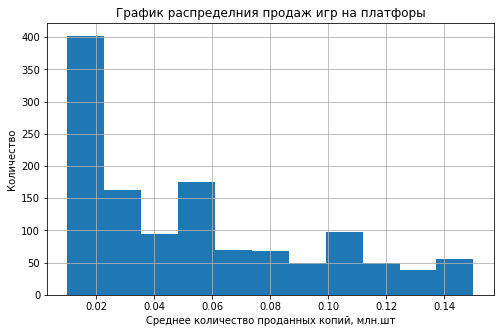

In [ ]:
prev_data.pivot_table(index=['name','platform'], values='sum_sales', aggfunc='mean').sort_values(by='sum_sales',ascending=False).query('sum_sales < 0.16').plot(kind='hist',grid=True, title='График распределния продаж игр на платфоры', bins=11,figsize=(8,5),legend=False)
plt.xlabel('Среднее количество проданных копий, млн.шт')
plt.ylabel('Количество')

plt.show()

На графике мы видим низподающие значения по продажам игр отностительно разных платформ. Чаще всего в продажах встречаются игры на платформы со средним общим значением до 0,02 млн проданных копий. Выведем список приставок на которые больше всего продаются копии игр

In [ ]:
prev_data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales',ascending=False).query('sum_sales > 0.02').head(5)


,sum_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80


Таким образом мы определили, что на платформу "PS4" выпускается подавляющее большинство игр

##### Определим за какой характерный срок появляются новые и исчезают старые платформы

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
period=data.query('year_of_release >0').pivot_table(index=['platform','year_of_release'],values='genre', aggfunc='count')
period=period.reset_index(1)

Построим таблицу с группировкой данных по столюцу "platform" и посчитаем количество лет использования платформы на рынке

In [ ]:
period=period.pivot_table(index='platform', values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False)
period.columns=['count_years']
period.head()

,count_years
platform,
pc,26
gb,13
nes,12
x360,12
psp,12


Для наглядного распределения данных построим график

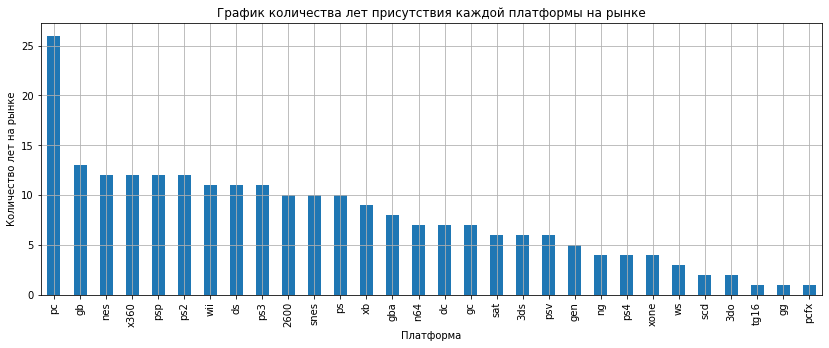

In [ ]:
period.plot(kind='bar', figsize=(14,5), grid=True, title="График количества лет присутствия каждой платформы на рынке", legend=False)
plt.xlabel('Платформа')
plt.ylabel('Количество лет на рынке')
plt.show()

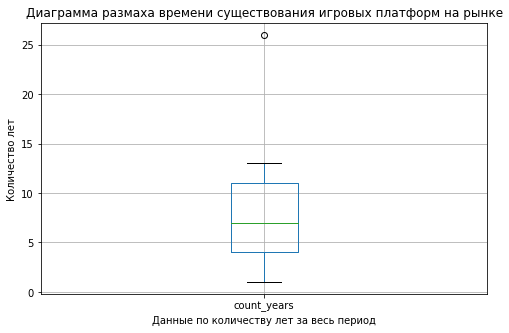

In [ ]:
period.boxplot(figsize=(8,5))
plt.title('Диаграмма размаха времени существования игровых платформ на рынке')
plt.xlabel('Данные по количеству лет за весь период')
plt.ylabel('Количество лет')
plt.show()

Посчитаем период времени за который платформы уходят с рынка убрав сильно выбивающееся значение по платформе *PC*

In [ ]:
print()
print('Средний период времени за который исчезают и появляются новые платформы составляет {:.0f} лет.'.format(period.query('platform != "pc"')['count_years'].mean()))


Средний период времени за который исчезают и появляются новые платформы составляет 7 лет.


<a id="step_3.6"></a>
#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Для анализа возьмём самую популярную платформу "PS4"

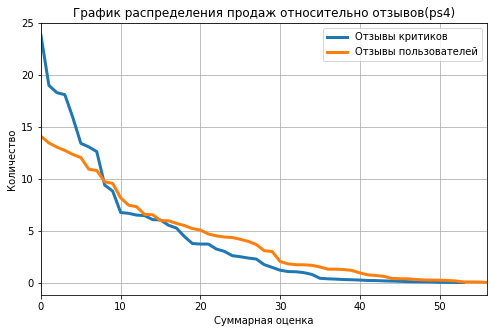

In [ ]:
c= prev_data.query('platform == "ps4"').pivot_table(index=['critic_score'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().plot(y='sum_sales', grid=True, title='График распределения продаж относительно отзывов(ps4)', linewidth=3, figsize=(8,5), label='Отзывы критиков')
prev_data.query('platform == "ps4"').pivot_table(index=['user_score'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().plot(y='sum_sales',ax=c, grid=True, title='График распределения продаж относительно отзывов(ps4)', linewidth=3, figsize=(8,5),label='Отзывы пользователей')
plt.xlabel('Суммарная оценка')
plt.ylabel('Количество')

plt.show() 


Глядя на графики можно однозначно сказать, что продажи на прямую зависят от отзывов пользователей и критиков.

<a id="step_3.7"></a>
#### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

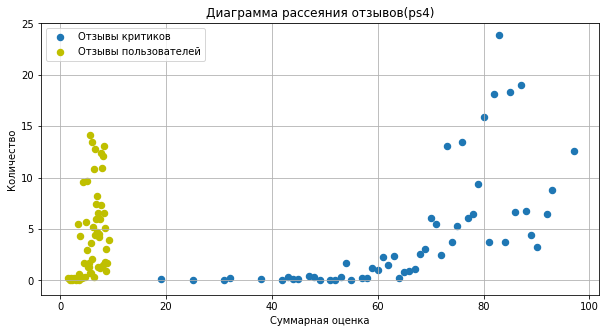

In [ ]:
y = prev_data.query('platform == "ps4"').pivot_table(index=['critic_score'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().plot(kind='scatter',y='sum_sales',x='critic_score', grid=True, title='Диаграмма рассеяния отзывов(ps4)', linewidth=3, figsize=(10,5),label='Отзывы критиков')
   
prev_data.query('platform == "ps4"').pivot_table(index=['user_score'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().plot(kind='scatter',y='sum_sales',x='user_score',ax=y, grid=True, title='Диаграмма рассеяния отзывов(ps4)', linewidth=3, figsize=(10,5),label='Отзывы пользователей', color='y')
plt.xlabel('Суммарная оценка')
plt.ylabel('Количество')


plt.show() 

##### Расчитаем кореляцию между отзывами и продажами

In [ ]:
prev_ps4 = prev_data.query('platform == "ps4"').pivot_table(index=['critic_score','user_score'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index()

In [ ]:
prev_ps4['user_score'].corr(prev_ps4['critic_score'])

0.5631150312547042

корреляция продаж между отзывами пользователей и продажами PS4

In [ ]:
prev_ps4['user_score'].corr(prev_ps4['sum_sales'])

-0.01907507140454872

корреляция продаж между отзывами критиков и продажами PS4

In [ ]:
prev_ps4['critic_score'].corr(prev_ps4['sum_sales'])

0.4225256118664904

Судя по данным корреляции, продажи игр на платформы PS4 зависят от отзывов критиков намного сильнее, чем от отзывов пользователей

<a id="step_3.8"></a>
#### Соотнесём выводы с продажами игр на других платформах

In [ ]:
other_platform=prev_data.groupby(['platform']).agg({'sum_sales': ['sum'], 'name': 'count'})
other_platform.columns=['Количество продаж','Количество выпущенных игр']
other_platform.sort_values(by='Количество продаж', ascending=False)

,Количество продаж,Количество выпущенных игр
platform,,
ps4,314.14,392
ps3,181.43,345
xone,159.32,247
3ds,143.25,303
x360,136.80,186
wii,78.29,138
pc,39.43,189
psv,32.99,358
psp,3.50,67


Для наглядности построим график количества продаж и соотнесём эти данные с количеством выпущенных игр на разные платформы.

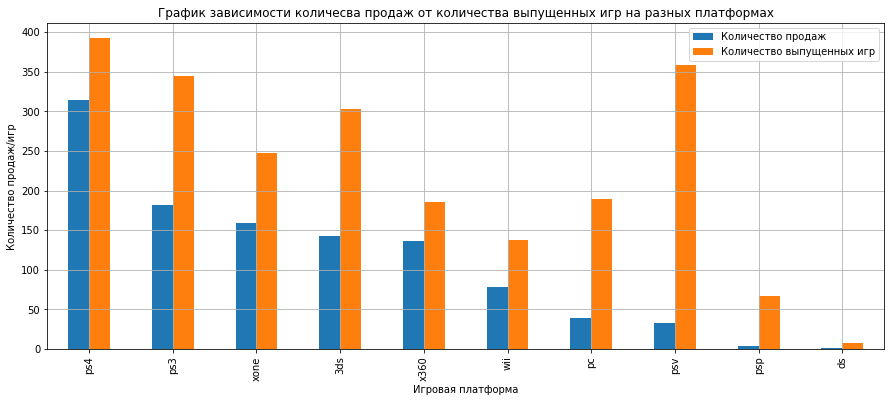

In [ ]:
other_platform.sort_values(by='Количество продаж', ascending=False).plot(kind='bar',grid=True,figsize=(15,6), title='График зависимости количесва продаж от количества выпущенных игр на разных платформах')
plt.xlabel('Игровая платформа')
plt.ylabel('Количество продаж/игр')
plt.show()

Из графика мы можем видеть зависимость проданных копий от количества выпущенных игр на разные платформы, посчитаем конферсию между этими значениям, чтобы определить зависимость и более окупаемые платформы.

In [ ]:
other_platform['dependence']=(other_platform['Количество продаж']/other_platform['Количество выпущенных игр'])*100

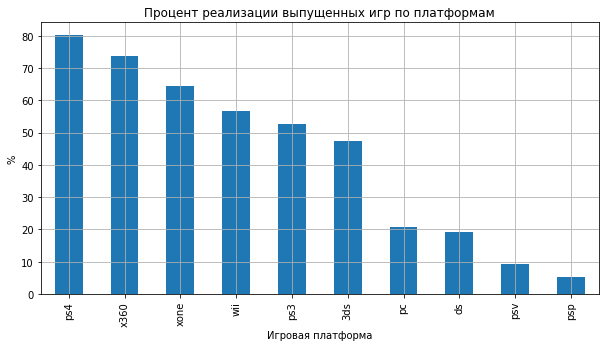

In [ ]:
other_platform.sort_values(by='dependence', ascending=False).plot(kind='bar', y='dependence', grid=True,figsize=(10,5), title='Процент реализации выпущенных игр по платформам', legend=False)
plt.ylabel('%')
plt.xlabel('Игровая платформа')
plt.show()

Таким образом мы можем определить топ платформ под которые более продуктивно выпускать игры, т.к. чем выше отношение выпущенных игр от суммы сборов, тем выше процент окупаемости игр. И как следствие производитель игр будет выпускать первые релизы на более популярные платформы

<a id="step_3.9"></a>
#### Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
prev_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


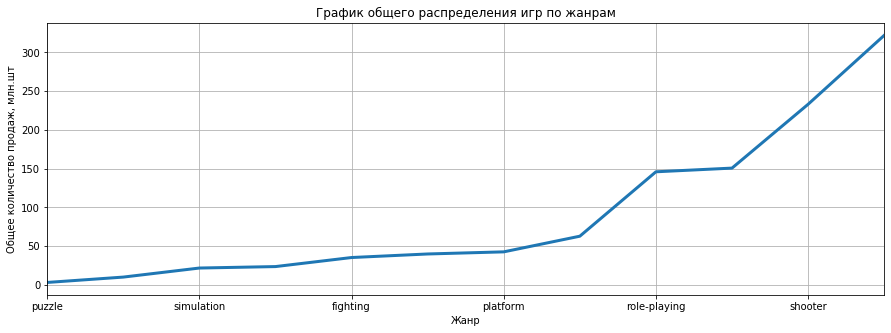

In [ ]:
genre=prev_data.pivot_table(index=['genre'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=True)
genre.plot(figsize=(15,5),grid=True,linewidth=3, title='График общего распределения игр по жанрам', legend=False)
plt.ylabel('Общее количество продаж, млн.шт')
plt.xlabel('Жанр')
plt.show()

<a id="step_3.end"></a>
### Вывод

Из проведённого анализа можно сделать вывод, что самые популярные платформы на которые охотнее всего расходятся игры - это **PS4,3ds,Wii,Xone,PC**. По конверсии и прибыльности от спроса рынка самые актуальные жанры - **"action","shooter","role-playing"**. А так же мы увидели, что суммы от продаж зависят от мнения критиков на много сильнее, чем от мнения пользователей.

----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_4.1"></a>
### Глава 4. Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP):

<a id="step_4.2"></a>
##### Самые популярные платформы (топ-5). Опишем различия в долях продаж

In [ ]:
prev_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### NA - Северная Америка

In [ ]:
na_top = prev_data.pivot_table(index='platform', values=['na_sales','sum_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_top['na_share_of_sales'] = (na_top['na_sales']/na_top['sum_sales']).round(2)
na_top.head()

,na_sales,sum_sales,na_share_of_sales
platform,,,
ps4,108.74,314.14,0.35
xone,93.12,159.32,0.58
x360,81.66,136.80,0.60
ps3,63.50,181.43,0.35
3ds,38.20,143.25,0.27


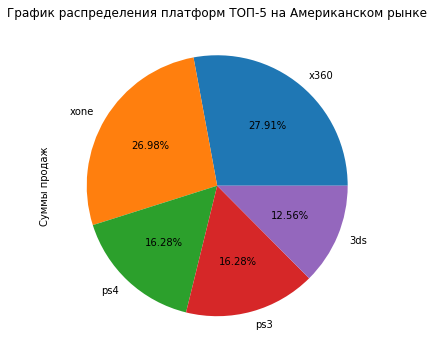

In [ ]:
na_top.head().sort_values(by='na_share_of_sales', ascending=False).plot(kind='pie',y='na_share_of_sales', figsize=(6,6), title='График распределения платформ ТОП-5 на Американском рынке',legend=False,autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

#### EU - Европейский союз

In [ ]:
eu_top = prev_data.pivot_table(index='platform', values=['eu_sales','sum_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_top['eu_share_of_sales'] = (eu_top['eu_sales']/eu_top['sum_sales']).round(2)
eu_top.head()

,eu_sales,sum_sales,eu_share_of_sales
platform,,,
ps4,141.09,314.14,0.45
ps3,67.81,181.43,0.37
xone,51.59,159.32,0.32
x360,42.52,136.80,0.31
3ds,30.96,143.25,0.22


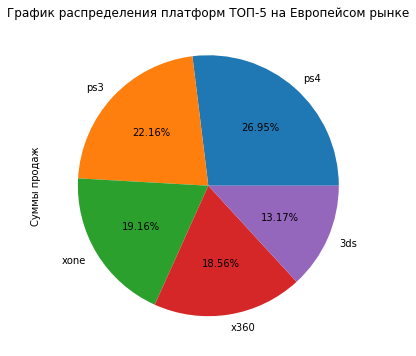

In [ ]:
eu_top.head().sort_values(by='eu_share_of_sales', ascending=False).plot(kind='pie', y='eu_share_of_sales',  figsize=(6,6), title='График распределения платформ ТОП-5 на Европейсом рынке',legend=False,autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

#### JP - Япония

In [ ]:
jp_top = prev_data.pivot_table(index='platform', values=['jp_sales','sum_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_top['jp_share_of_sales'] = (jp_top['jp_sales']/jp_top['sum_sales']).round(2)
jp_top.head()

,jp_sales,sum_sales,jp_share_of_sales
platform,,,
3ds,67.81,143.25,0.47
ps3,23.35,181.43,0.13
psv,18.59,32.99,0.56
ps4,15.96,314.14,0.05
wii,10.93,78.29,0.14


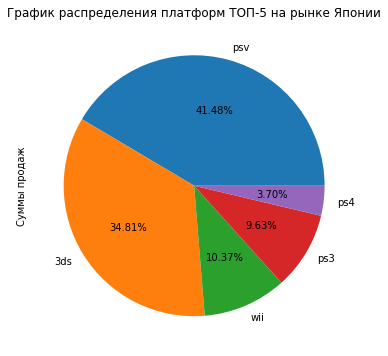

In [ ]:
jp_top.head().sort_values(by='jp_share_of_sales', ascending=False).plot(kind='pie', y='jp_share_of_sales', figsize=(6,6), title='График распределения платформ ТОП-5 на рынке Японии',legend=False,autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

<a id="step_4.3"></a>
##### Самые популярные жанры (топ-5). Поясним разницу

#### NA

In [ ]:
na_top5_genres = prev_data.pivot_table(index='genre', values=['na_sales','sum_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_top5_genres.head()

,na_sales,sum_sales
genre,,
action,126.05,321.87
shooter,109.74,232.98
sports,65.27,150.65
role-playing,46.40,145.89
misc,27.49,62.82


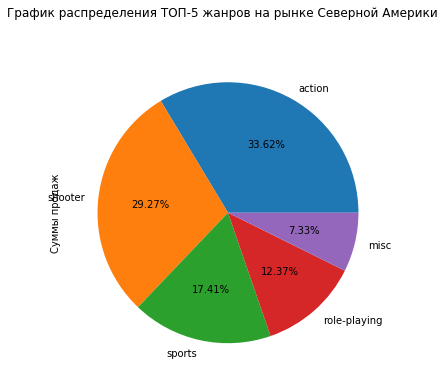

In [ ]:
na_top5_genres.head().plot(kind='pie', y='na_sales', figsize=(6,6), title='График распределения ТОП-5 жанров на рынке Северной Америки',subplots=True, legend=False,autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

#### EU

In [ ]:
eu_top5_genres = prev_data.pivot_table(index='genre', values=['eu_sales','sum_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_top5_genres.head()

,eu_sales,sum_sales
genre,,
action,118.13,321.87
shooter,87.86,232.98
sports,60.52,150.65
role-playing,36.97,145.89
racing,20.19,39.89


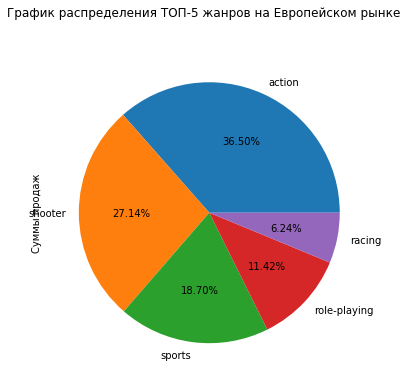

In [ ]:
eu_top5_genres.head().plot(kind='pie', y='eu_sales', figsize=(6,6), title='График распределения ТОП-5 жанров на Европейском рынке',subplots=True, legend=False,autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

#### JP

In [ ]:
jp_top5_genres = prev_data.pivot_table(index='genre', values=['jp_sales','sum_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_top5_genres.head()

,jp_sales,sum_sales
genre,,
role-playing,51.04,145.89
action,40.49,321.87
misc,9.20,62.82
fighting,7.65,35.31
shooter,6.61,232.98


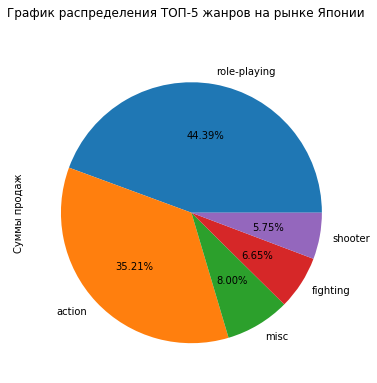

In [ ]:
jp_top5_genres.head().plot(kind='pie', y='jp_sales', figsize=(6,6), title='График распределения ТОП-5 жанров на рынке Японии',subplots=True, legend=False, autopct='%1.2f%%')
plt.ylabel('Суммы продаж')
plt.show()

<a id="step_4.4"></a>
##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
prev_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Посмторим уникальные значения и за одно проверим на дубли

In [ ]:
print(prev_data['rating'].unique())

['M' nan 'E' 'T' 'E10+']


In [ ]:
prev_data.loc[prev_data['rating'].isna(),'rating'] = 'N/A'

Проверим результат:

In [ ]:
print(prev_data['rating'].unique())

['M' 'N/A' 'E' 'T' 'E10+']


Отлично дублей и выбивающихся значений нет, можем работать дальше

In [ ]:
group_esrb = prev_data.groupby(['rating','genre'])['na_sales','eu_sales','jp_sales'].mean()
group_esrb.columns=['Северная Америка','Европа','Япония']

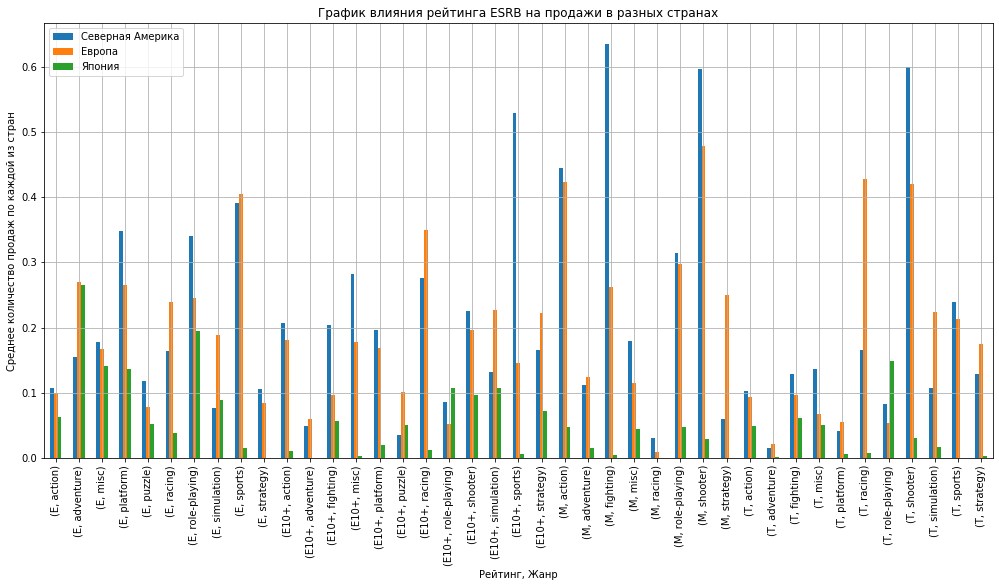

In [ ]:
group_esrb.query('rating != "N/A"').plot(kind='bar',figsize=(17,8),grid=True,title='График влияния рейтинга ESRB на продажи в разных странах')
plt.xlabel('Рейтинг, Жанр')
plt.ylabel('Среднее количество продаж по каждой из стран')
plt.show()

Для наглядного представления распределения данных по пропущенным значениям рейтинга, построим график влияния рейтинга ESRB

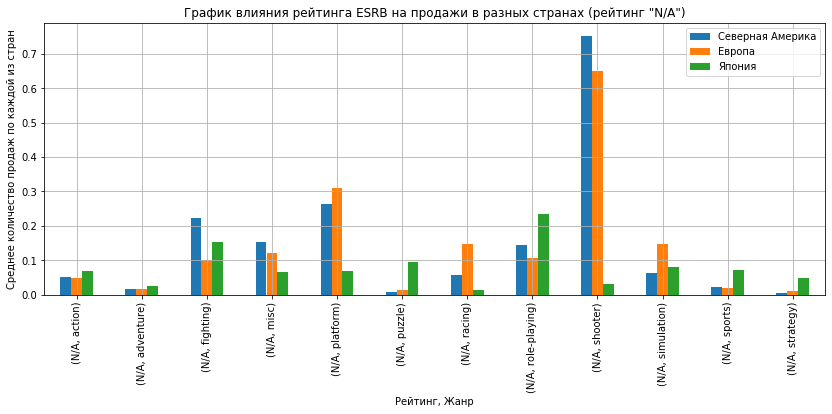

In [ ]:
g = prev_data.query('rating == "N/A"').groupby(['rating','genre'])['na_sales','eu_sales','jp_sales'].mean()
g.columns=['Северная Америка','Европа','Япония']
g.plot(kind='bar',figsize=(14,5),grid=True,title='График влияния рейтинга ESRB на продажи в разных странах (рейтинг "N/A")')
plt.xlabel('Рейтинг, Жанр')
plt.ylabel('Среднее количество продаж по каждой из стран')
plt.show()

<a id="step_4.end"></a>
### Вывод

По портрету пользователя можно сказать, что в станах "Севреной Америки","Европе" и "Японии" в ходу одни и теже платформы из ТОП-5, но в процентном соотношении в каждом регионе они распростаранены по разному, по всей видимости это связано с менталитетом и образом жизни в разных странах. Так же есть отличия и в использовании жанров, если для Северной Америки и Европы более популярны жанры *shooter* и *action*, то для Японии более распространён жанр *action* и *role-playing*. В одном жанре все схожи - это *action*. Так же можем отметить, что самой подверженной рейтингу *ESRB* из трёх стран оказалась Япония, там наблюдается самая большая зависимость.

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_5.1"></a>
### Глава 5. Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для того чтобы доказать или опровергнуть гипотезу, сформулируем нулевую и альтернативную гипотезы следующим образом:<br>
- **нулевая гипотеза** будет звучать так - средние пользовательские рейтинги платформ *Xbox One* и *PC* равны, тогда как<br>
- **альтернативная гипотеза** - пользовательские рейтинги не равны.

##### Определим сначала дисперсию и среднее отклонение <br><br> Дисперсия:


**"Xbox One"**

In [ ]:
data_xb=data.query('platform == "xone"')

In [ ]:
data_xb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


Для корректной статистики возьмём только те игры, которые имеют отзывы пользователей, а отсутсвующие данные удалим из нашей выборки

In [ ]:
data_xb=data_xb.dropna(subset=['user_score'])
data_xb.loc[data_xb['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


Посторим гистограмму для понимания распределения данных

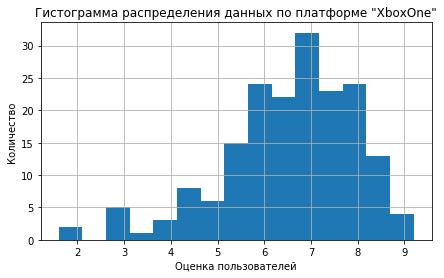

In [ ]:
data.query('platform == "xone"').groupby('platform')['user_score'].plot(kind='hist',grid=True, bins=15, figsize=(7,4))
plt.title('Гистограмма распределения данных по платформе "XboxOne"')
plt.ylabel('Количество')
plt.xlabel('Оценка пользователей')
plt.show()

На нашем графике прослеживается нормальное распределение со скосом влево

**"PC"**

In [ ]:
data_pc=data.query('platform == "pc"')
data_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
85,the sims 3,pc,2009,simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,world of warcraft,pc,2004,role-playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,microsoft flight simulator,pc,1996,simulation,3.22,1.69,0.0,0.20,NaN,NaN,NaN,5.11
218,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83


Для корректной статистики возьмём только те игры, которые имеют отзывы пользователей, а отсутсвующие данные удалим из нашей выборки

In [ ]:
data_pc=data_pc.dropna(subset=['user_score'])
data_pc.loc[data_pc['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


Посторим гистограмму для понимания распределения данных

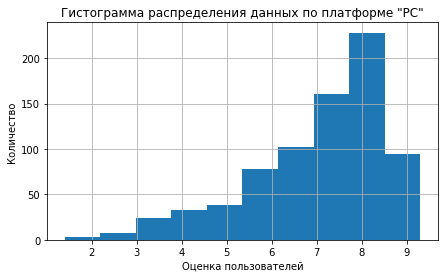

In [ ]:
data_pc.groupby('platform')['user_score'].plot(kind='hist',grid=True, bins=10, figsize=(7,4))
plt.title('Гистограмма распределения данных по платформе "PC"')
plt.ylabel('Количество')
plt.xlabel('Оценка пользователей')
plt.show()

Здесь так же прослеживается нормальное распределение со скосом влево

##### Определим дисперсные  значения по рейтингам пользователей для платформам "Xbox One" и "PC"

In [ ]:
rating_data_xb=data_xb['user_score']
rating_data_pc=data_pc['user_score']

dispers_xbox = np.var(rating_data_xb)
dispers_pc = np.var(rating_data_pc)

print('Дисперсия пользовательских рейтингов плтформы Xbox One равна', dispers_xbox )
print('Дисперсия пользовательских рейтингов платформы PC равна', dispers_pc)

Дисперсия пользовательских рейтингов плтформы Xbox One равна 1.8965188383045526
Дисперсия пользовательских рейтингов платформы PC равна 2.3377471580367684


##### Стандартное отклонение:

In [ ]:
std_xone=np.std(rating_data_xb)
std_pc=np.std(rating_data_pc)

print('Стандартное отклонение пользовательских рейтингов плтформы Xbox One равно',std_xone)
print('Стандартное отклонение пользовательских рейтингов платформы PC равно',std_pc)

Стандартное отклонение пользовательских рейтингов плтформы Xbox One равно 1.377141546212499
Стандартное отклонение пользовательских рейтингов платформы PC равно 1.5289693123266956


##### Имея все данные можно приступить к даказательству гипотезы о равенстве пользовательских рейтингов по платформам

In [ ]:
sample_xb = rating_data_xb
sample_pc = rating_data_pc

alpha = .05 

results_rating = st.ttest_ind(
    sample_xb, 
    sample_pc, equal_var=False)

print('p-значение: ',results_rating.pvalue)

if results_rating.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.935072360183565e-06
Отвергаем нулевую гипотезу


Таким образом мы отвергаем нулевую теорию о равенстве пользовательских рейтингов и подтверждаем альтернативную гипотезу - пользовательские рейтинги платформ "XboxOne" и "PC" отличаются.

<a id="step_5.2"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные.

Для того чтобы доказать или опровергнуть гипотезу, сформулируем нулевую и альтернативную гипотезы следующим образом:<br>
- **нулевая гипотеза** будет звучать так - средние пользовательские рейтинги платформ *Action* и *Sports* отличаются(не равны), тогда как<br>
- **альтернативная гипотеза** - пользовательские рейтинги жанров *Action* и *Sports* равны.

##### Определим сначала дисперсию и стандартное отклонение <br><br>Составим таблицу

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Для дальнейшей работы так же уберём отсутствующие данные из нашей выборки и построим гистограмму распределения данных, для наглядного представления о распределении

In [ ]:
data_genre_a=data.loc[data['genre'] == 'action'].dropna(subset=['user_score'])
data_genre_s=data.loc[data['genre'] == 'sports'].dropna(subset=['user_score'])

##### Построим гистограмму по жанру "Action"

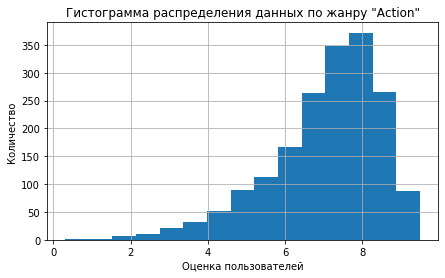

In [ ]:
data_genre_a['user_score'].plot(kind='hist',grid=True, bins=15, figsize=(7,4))
plt.title('Гистограмма распределения данных по жанру "Action"')
plt.ylabel('Количество')
plt.xlabel('Оценка пользователей')
plt.show()

##### Построим гистограмму по жанру "Sport"

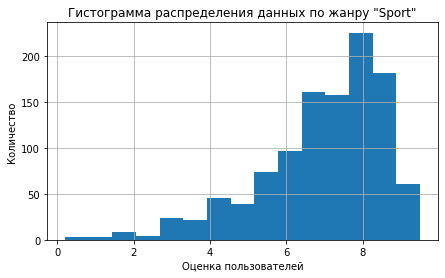

In [ ]:
data_genre_s['user_score'].plot(kind='hist',grid=True, bins=15, figsize=(7,4))
plt.title('Гистограмма распределения данных по жанру "Sport"')
plt.ylabel('Количество')
plt.xlabel('Оценка пользователей')
plt.show()

##### Определим дисперсные  значения по рейтингам жанров "Action" и "Sport"

In [ ]:
rating_data_a=data_genre_a['user_score']
rating_data_s=data_genre_s['user_score']

dispers_action = np.var(rating_data_a)
dispers_sport = np.var(rating_data_s)

print('Дисперсия пользовательских рейтингов жанра "Action" равна', dispers_action)
print('Дисперсия пользовательских рейтингов жанра "Sport" равна', dispers_sport)

Дисперсия пользовательских рейтингов жанра "Action" равна 2.03063665382663
Дисперсия пользовательских рейтингов жанра "Sport" равна 2.594160671177017


##### Стандартное отклонение:

In [ ]:
std_action=np.std(rating_data_a)
std_sport=np.std(rating_data_s)

print('Стандартное отклонение пользовательских рейтингов жанра "Action" равно',std_action)
print('Стандартное отклонение пользовательских рейтингов жанра "Sport" равно',std_sport)

Стандартное отклонение пользовательских рейтингов жанра "Action" равно 1.4250040890561086
Стандартное отклонение пользовательских рейтингов жанра "Sport" равно 1.6106398328543279


##### Проверим гипотезу о равенстве пользовательских рейтингов по жанрам Action и Sports.

In [ ]:
sample_action = rating_data_a
sample_sport = rating_data_s

alpha = .05

results_genre = st.ttest_ind(
    sample_action, 
    sample_sport, equal_var=False)

print('p-значение: ',1-results_genre.pvalue)

if 1-results_genre.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.8851618120850171
Отвергаем нулевую гипотезу


Таким образом мы отвергаем нулевую гипотезу, и подтверждаем альтернативную - средние пользовательские рейтинги платформ "Action" и "Sports" практически равны друг другу.

<a id="step_5.end"></a>
### Вывод

Исходя из полученных данных мы можем делать вывод о том, что пользовательские рейтинги платформ "Xbox One" и "PC" отличаются друг от друга. В отличии от рейтингов по платформам, в случае с рейтингами по жанрам  "Action" и "Sport"  мы с уверенностью можем сказать, что рейтинги не отличаются друг от друга более чем на величину 5%

----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_6.end"></a>
### Глава 6. Общий вывод

В нашем распоряжении из открытых источников были исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Перед нами стояла задача выявить определяющие успешность игры закономерности. И сделать ставку на потенциально популярный продукт, а так же спланировать рекламные кампании.
</br>

Исходя из проанализированных данных и анализа распределения популярности игр и платформ, а так же анализа составленного портрета пользователя по странам, можно однозначно сделать вывод о том, количество выпускаемых игр, а так же самая большая прибыль идёт по платформе *PS4* и составляет подавляющее большинство по отношению к остальному рынку. Так же отметим, что несмотря на то, что Северной Америке большей популярностью пользуется *PC*,  в Еропе *Xbox One*, а  в Японии *PSV*, во всех странах популярен жанр *Action* </br>

В итоговом заключении можно рекомендовать, делать ставку на игры жанра "action" под платформу PS4, PC, XboxOne и PSV, а так же для уеличения спроса на рынке, насытить прилавки магазина ассортиментом в зависимости от предпочтений кажой страны в отдельности:
 - Для Северной Америки -это игры жанра "shooter","action" и "sport" под платформы "XboxOne","Wii","PS4".
 - Для Европейских стран - игры жанра "shooter","sport","action" под платформы "PC","PS4","XboxOne".
 - Для Японии - "action","role-playing", под платформы "PSV","3ds". 